# Task Desription

Please read first the following abstract

## Abstract
                
RNA-Seq reveals an unprecedented complexity of the neuroblastoma transcriptome and is suitable for clinical endpoint prediction [ microarray ]

### Experiment Description  

We generated gene expression profiles from 498 primary neuroblastomas using RNA-Seq and microarrays. We sought to systematically evaluate the capability of RNA deep-sequencing (RNA-Seq)-based classification for clinical endpoint prediction in comparison to microarray-based ones. The neuroblastoma cohort was randomly divided into training and validation sets (**Please note:** <em>in the following we refer to this validation set as test set</em>), and 360 predictive models on six clinical endpoints were generated and evaluated. While prediction performances did not differ considerably between the two technical platforms, the RNA-Seq data processing pipelines, or feature levels (i.e., gene, transcript, and exon junction levels), RNA-Seq models based on the AceView database performed best on most endpoints. Collectively, our study reveals an unprecedented complexity of the neuroblastoma transcriptome, and provides guidelines for the development of gene expression-based predictive classifiers using high-throughput technologies.  Sample clinical characteristics definitions:  

* sex: 
    <ul>
    <li>M = male</li>
    <li>F = female</li>
    </ul>
    
* age at diagnosis: The age in days at diagnosis 
    <ul>
    <li>integer</li>
    </ul>

* high risk: Clinically considered as high-risk neuroblastoma
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>


* INSS stage: Disease stage according to International Neuroblastoma Staging System ([INSS](https://www.cancer.org/cancer/neuroblastoma/detection-diagnosis-staging/staging.html)) 
    <ul>
    <li>1</li>
    <li>2</li>
    <li>3</li>
    <li>4</li>
    <li>4S</li>
    </ul>


* progression: Occurrence of a tumor progression event
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>



* death from disease: Occurrence of death from the disease (yes=1; no=0) 
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>





Gene expression of 498 neuroblastoma samples was quantified by RNA sequencing as well as by microarray analyses in order to understand the neuroblastoma transcriptome and predict clinical endpoints. 


## Task

The task is to predict the missing values in the validation set (from here on called test set). Do this either with the RNASeq or the Microarray data, or potentially both?



## Code

To make your start a bit easier, here is a small notebook reading the data in. It finishes with a function enabling you to save your predictions for submission. 

#### from here, the code starts

First some imports 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # plotting and visulisation
import seaborn as sns # nicer (easier) visualisation
%matplotlib inline


# for saving
import os,os.path

### Setting  up directory and filenames

In [2]:
#data_dir ='/rds/homes/b/bjt186/MLP'.format(os.path.sep)

#fn_fpkm             = 'log2FPKM_clean.tsv.gz'
#fn_patient_info     = 'patientInfo.tsv'
#fn_prop_intensities = 'allProbIntensities.tsv'




### Load the RNAs-Seq data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [3]:
#df_fpkm = pd.read_csv('{}/{}'.format(data_dir,fn_fpkm),sep='\t',compression='.gz').rename({'00gene_id':'gene_id'},axis=1)

df_fpkm = pd.read_csv('log2FPKM.tsv.gz',sep='\t').rename({'00gene_id':'gene_id'},axis=1)

#df = pd.read_csv('filename.zip', compression='zip', header=0, sep=',', quotechar='"')

df_fpkm = df_fpkm.set_index(['gene_id'])
df_fpkm.columns.name = 'ID'

df_fpkm.head()

ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,0.000000,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,0.865850,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887


### Load the Microarray data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [4]:
#df_prop_intensities = pd.read_csv('{}/{}'.format(data_dir,fn_prop_intensities),sep='\t').set_index(['Reporter.Identifier'])
#df_prop_intensities.columns.name = 'ID'

#df_prop_intensities.head()

### Load the patient factors, including the potential endpoints 

This part already sets the indeces in the DataFrame. Please feel free to change as required. 
Please note, that the ```FactorValues``` should have a 1-to-1 correspondence to the factors desc ribed in the abstract. 

In [5]:
#df_patient_info = pd.read_csv('{}/{}'.format(data_dir,fn_patient_info),sep='\t').set_index('ID')
df_patient_info = pd.read_csv('patientInfo.tsv',sep='\t')
df_patient_info.columns.name = 'FactorValues'

df_patient_info.head()

FactorValues,ID,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
0,NB498,female,530,NaN,NaN,NaN,NaN
1,NB497,female,379,0.0,0.0,1,0.0
2,NB496,male,132,NaN,NaN,NaN,NaN
3,NB495,male,163,0.0,0.0,1,0.0
4,NB494,male,56,NaN,NaN,NaN,NaN


####  Divide into training and external testing

As you might have already noticed, we removed some of the factor values for some of the patient **ID**s.
Every row, where this information is missing indicate a real validation entry. We can use this information and create two separate DataFrames, one for training, one for the validation (testing). 

The task is to predict the missing values, either with the RNASeq or the Microarray data, or potentially both?



In [6]:
df_patient_info_train  = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].notna()]
df_patient_info_test   = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].isna()]



In [7]:
df_patient_info_train.head()

FactorValues,ID,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
1,NB497,female,379,0.0,0.0,1,0.0
3,NB495,male,163,0.0,0.0,1,0.0
5,NB493,male,190,0.0,0.0,1,0.0
7,NB491,male,2326,0.0,1.0,4,1.0
9,NB489,female,865,0.0,1.0,4,0.0


In [8]:
df_patient_info_test.head()

FactorValues,ID,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
0,NB498,female,530,NaN,NaN,NaN,NaN
2,NB496,male,132,NaN,NaN,NaN,NaN
4,NB494,male,56,NaN,NaN,NaN,NaN
6,NB492,male,947,NaN,NaN,NaN,NaN
8,NB490,female,1759,NaN,NaN,NaN,NaN


## Analysis

From here on, you will need to use your skills ...

### Note:
To be clear, there are **multiple** target features/attributes to predict. Say you want to build a model predicting **death from disease** of a patient, your target variable is ```'FactorValue..death.from.disease.'``` and the corresponding target vector <em>y</em> would be as follows:

```python
y_train = df_patient_info_train['FactorValue..death.from.disease.'].astype(int)
```
Taking the other data into account (RNASeq or microarray) as ``` X_train``` (you will have to preprocess and split this information yourselves), you could for example build a random forest model:

```python
from sklearn.ensemble import RandomForestClassifier
random_f_model_death = random_f_model = RandomForestClassifier() 
random_f_model_death.fit(X_train,y_train)
```
and predict ```y_test``` using ```X_test```. 

Obviously, you want to avoid any overfitting and might want to use appropriate validation approaches. 

Once you have your model and the prediction for the test data, you should be able to fill the ```'FactorValue..death.from.disease.'``` column in the test set. 

For the submission, please also include the confidence/probability/score for each of the prediction (assume ```1``` to be the value for the positive class). This only applies to the factors:  **high risk**, **progression** and **death from disease** . 

The other two factors need to be treated differently.  

Using this very rough outline, you should be able to predict all factors in the test data. 











In [9]:
print("RNASeq")

print(np.shape(df_fpkm))

# size of the patient info training set

print("Patient info train")

print(np.shape(df_patient_info_train))

# and the size of the patient info test set

print("Patient info test")

print(np.shape(df_patient_info_test))

RNASeq
(23146, 498)
Patient info train
(249, 7)
Patient info test
(249, 7)


['ID', 'FactorValue..Sex.', 'FactorValue..age.at.diagnosis.', 'FactorValue..death.from.disease.', 'FactorValue..high.risk.', 'FactorValue..inss.stage.', 'FactorValue..progression.']
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0]


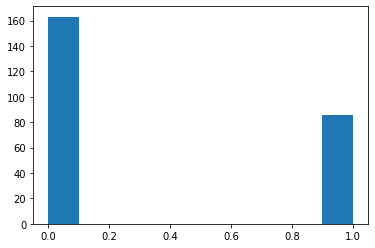

In [10]:
# have a look at the INSS classifications

headers_list = list(df_patient_info_train.columns)
print(headers_list)
INSS_list = list(df_patient_info_train.iloc[:,4])
print(INSS_list[0:10])

from collections import Counter
INSS_cats = Counter(INSS_list)
plt.hist(INSS_list)
INSS_dict = {"1":60, "2":40, "3":30, "4":91, "4S":28}



In [11]:
# combine 1+2, 3+4 to give 'early(1)' 'mid (2)' and 'late(3)' stages
# aim is to improve performance of random forest
# re-label 4S as 3 after combining categories

# whoops! this makes everything 1 for some reason
#df_patient_info_train.iloc[:,4].replace({"2": "1"}, inplace=True) because why not
#df_patient_info_train.iloc[:,4].replace({"4S": "FFF"}, inplace=True)
#df_patient_info_train.iloc[:,4].replace({"3": "2"}, inplace=True)
#df_patient_info_train.iloc[:,4].replace({"4":"2"}, inplace=True)
#df_patient_info_train.iloc[:,4].replace({"FFF": "3"}, inplace=True)

#plt.hist(INSS_reclass.iloc[:,4])
#print(INSS_reclass.iloc[10:50,4:])


In [12]:
from sklearn.ensemble import RandomForestClassifier

# using the RNA data as the X train

X_train = df_fpkm[0:249]

#looking for the people dying from the disease as the training set
y_train = df_patient_info_train['FactorValue..death.from.disease.'].astype(int)

random_f_model_death = random_f_model = RandomForestClassifier()
random_f_model_death.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
x_posed_SEQ = df_fpkm.T
#print(x_posed_SEQ.iloc[150:200,:])
# load the index as a column called Idents
x_posed_SEQ['Idents'] = x_posed_SEQ.index

# create Idents as list
Idents_list = list(x_posed_SEQ['Idents'])
#print(Idents_list[0:100])

#str = "NB013_BC02FPACXX_L1_CGATGT"
#print(str[0:5])

#create empty list to hold clean idents
trimmed_idents = []

# iterate
for ident in Idents_list:
    new_ident = ident[0:5]
    trimmed_idents.append(new_ident)

print(trimmed_idents)



['NB001', 'NB002', 'NB003', 'NB004', 'NB005', 'NB006', 'NB007', 'NB008', 'NB009', 'NB010', 'NB011', 'NB012', 'NB013', 'NB014', 'NB015', 'NB016', 'NB017', 'NB018', 'NB019', 'NB020', 'NB021', 'NB022', 'NB023', 'NB024', 'NB025', 'NB026', 'NB027', 'NB028', 'NB029', 'NB030', 'NB031', 'NB032', 'NB033', 'NB034', 'NB035', 'NB036', 'NB037', 'NB038', 'NB039', 'NB040', 'NB041', 'NB042', 'NB043', 'NB044', 'NB045', 'NB046', 'NB047', 'NB048', 'NB049', 'NB050', 'NB051', 'NB052', 'NB053', 'NB054', 'NB055', 'NB056', 'NB057', 'NB058', 'NB059', 'NB060', 'NB061', 'NB062', 'NB063', 'NB064', 'NB065', 'NB066', 'NB067', 'NB068', 'NB069', 'NB070', 'NB071', 'NB072', 'NB073', 'NB074', 'NB075', 'NB076', 'NB077', 'NB078', 'NB079', 'NB080', 'NB081', 'NB082', 'NB083', 'NB084', 'NB085', 'NB086', 'NB087', 'NB088', 'NB089', 'NB090', 'NB091', 'NB092', 'NB093', 'NB094', 'NB095', 'NB096', 'NB097', 'NB098', 'NB099', 'NB100', 'NB101', 'NB102', 'NB103', 'NB104', 'NB105', 'NB106', 'NB107', 'NB108', 'NB109', 'NB110', 'NB111', 

In [14]:
#load clean idents back into dataframe as index
x_posed_SEQ.index = trimmed_idents
# and as an ID column to allow for the merge
x_posed_SEQ['ID'] = trimmed_idents
# drop the Idents column
clean_SEQ = x_posed_SEQ.drop('Idents', 1)

print(clean_SEQ.shape)
print(clean_SEQ.head())
print(clean_SEQ.iloc[150:200,:])


(498, 23147)
gene_id  1/2-SBSRNA4      A1BG  A1BG-AS1      A1CF     A2LD1       A2M  \
NB001       0.834381  1.910053  1.453191  0.005102  0.580151  5.137167   
NB002       0.743094  0.941996  0.640614  0.005902  0.738233  5.116157   
NB003       0.909414  1.950857  1.156765  0.005192  0.927667  5.405414   
NB004       0.795775  1.989477  1.525277  0.000000  0.936497  6.034460   
NB005       0.905540  1.942946  1.365043  0.025347  0.924853  5.613060   

gene_id     A2ML1     A2MP1    A4GALT     A4GNT  ...     ZWINT      ZXDA  \
NB001    0.027558  0.170671  1.535670  0.057101  ...  5.045111  1.575337   
NB002    0.000000  0.000000  1.038092  0.066125  ...  5.037365  1.487028   
NB003    0.028036  0.045284  0.943194  0.000000  ...  4.721531  1.508530   
NB004    0.000000  0.044204  1.091341  0.028540  ...  4.157084  1.351250   
NB005    0.000000  0.000000  1.549078  0.032056  ...  4.766362  1.038738   

gene_id      ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX     ZZEF1      ZZZ3  \
NB00

C:\Users\hussa\AppData\Local\Temp/ipykernel_6500/3417056787.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean_SEQ = x_posed_SEQ.drop('Idents', 1)


In [15]:
Merged_Data_patient_train=clean_SEQ.merge(df_patient_info_train, on='ID', how='inner')
clean_patient_train = Merged_Data_patient_train.iloc[:,:-7]

print((Merged_Data_patient_train).head)

lists = clean_patient_train.columns.values.tolist()

print(len(lists))
print(clean_patient_train.shape)
#print(clean_patient_train.head())
# ok that looks good so we can drop the id column now
clean_patient_train = clean_patient_train.drop('ID', 1)
print(clean_patient_train.head())


<bound method NDFrame.head of      1/2-SBSRNA4      A1BG  A1BG-AS1      A1CF     A2LD1       A2M     A2ML1  \
0       0.834381  1.910053  1.453191  0.005102  0.580151  5.137167  0.027558   
1       0.909414  1.950857  1.156765  0.005192  0.927667  5.405414  0.028036   
2       0.905540  1.942946  1.365043  0.025347  0.924853  5.613060  0.000000   
3       1.811352  1.617745  1.304178  0.000000  1.018705  6.956301  0.000000   
4       0.981855  1.436439  0.771248  0.021880  0.666877  5.170205  0.000000   
..           ...       ...       ...       ...       ...       ...       ...   
244     0.997977  2.336929  1.182908  0.024298  0.673627  5.266052  0.000000   
245     0.842437  1.205317  0.643751  0.000000  0.837443  5.049343  0.000000   
246     0.805515  1.649027  0.925425  0.005746  0.743496  5.223052  0.000000   
247     0.868249  1.493852  1.208723  0.004853  0.812093  6.655558  0.000000   
248     0.660139  1.994978  1.529221  0.022780  1.068072  6.581892  0.000000   

        A

C:\Users\hussa\AppData\Local\Temp/ipykernel_6500/2778127328.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean_patient_train = clean_patient_train.drop('ID', 1)


KeyError: "['ID'] not found in axis"

In [ ]:
print(x_posed_SEQ.head)

In [ ]:
print(df_patient_info_train.iloc[150:200,:])

In [ ]:
#print(Merged_Data_patient_train)
first_column = Merged_Data_patient_train.iloc[:, 0]
print(first_column)


In [ ]:
type(Merged_Data_patient_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train = clean_patient_train

# looking for the people dying from the disease as the training set
y_train = df_patient_info_train['FactorValue..death.from.disease.'].astype(int)

random_f_model_death = random_f_model = RandomForestClassifier()
random_f_model_death.fit(X_train,y_train)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=clean_patient_train  # Features
y=df_patient_info_train['FactorValue..death.from.disease.'].astype(int)  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [ ]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# predictions
y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=lists).sort_values(ascending=False)
feature_imp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=lists)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.ylim(0, 10)
plt.show()

In [ ]:
df_patient_info_train['FactorValue..Sex._male'].replace({'male':1, 'female':0}, inplace=True)
print(df_patient_info_train)

In [ ]:
df_patient_info_train.rename(columns={'FactorValue..inss.stage._4S' : 'FactorValue..inss.stage._5'})

In [ ]:
from sklearn.ensemble import RandomForestRegressor

independentVariables = clean_patient_test
rfModel_death = RandomForestRegressor()
rfModel_death.fit(independentVariables, df_patient_info_train['FactorValue..death.from.disease.'].astype(int))

generatedDeathValues = rfModel_death.predict(df_patient_info_test)
print(generatedDeathValues)